Epoch [0/1000], d_loss: 1.9045720100402832, g_loss: 0.7224721908569336
Epoch [100/1000], d_loss: 0.830718994140625, g_loss: 0.7098037004470825
Epoch [200/1000], d_loss: 0.824027419090271, g_loss: 0.721124529838562
Epoch [300/1000], d_loss: 0.8912125825881958, g_loss: 0.8174156546592712
Epoch [400/1000], d_loss: 1.0889192819595337, g_loss: 0.8682748079299927
Epoch [500/1000], d_loss: 1.3360302448272705, g_loss: 0.8256794810295105
Epoch [600/1000], d_loss: 1.462073564529419, g_loss: 0.8320260047912598
Epoch [700/1000], d_loss: 1.4581618309020996, g_loss: 0.8456241488456726
Epoch [800/1000], d_loss: 1.3947534561157227, g_loss: 0.8694452047348022
Epoch [900/1000], d_loss: 1.3447927236557007, g_loss: 0.8422905206680298


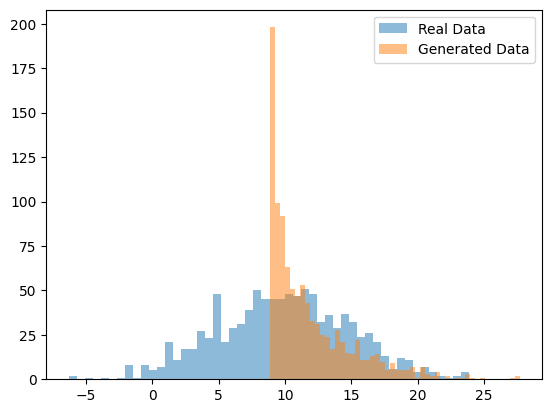

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Gerçek veri örneği: Tek boyutlu normal dağılım
real_data = torch.randn(1000, 1) * 5 + 10

# Üretici Ağ
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.model(x)

# Ayırt Edici Ağ
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Model ve optimizasyon fonksiyonları
generator = Generator()
discriminator = Discriminator()
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.001)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.001)

# Eğitim
for epoch in range(1000):
    # Ayırt ediciyi gerçek veri ile eğitin
    discriminator.zero_grad()
    real_output = discriminator(real_data)
    real_loss = criterion(real_output, torch.ones_like(real_output))

    # Üreticiyi rastgele gürültü ile eğitin
    noise = torch.randn(1000, 1)
    fake_data = generator(noise)
    fake_output = discriminator(fake_data)
    fake_loss = criterion(fake_output, torch.zeros_like(fake_output))

    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_d.step()

    # Üreticiyi eğitin
    generator.zero_grad()
    noise = torch.randn(1000, 1)
    fake_data = generator(noise)
    fake_output = discriminator(fake_data)
    g_loss = criterion(fake_output, torch.ones_like(fake_output))
    g_loss.backward()
    optimizer_g.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/1000], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")

# Sonuçları görselleştirme
noise = torch.randn(1000, 1)
generated_data = generator(noise).detach().numpy()
plt.hist(real_data.numpy(), bins=50, alpha=0.5, label='Real Data')
plt.hist(generated_data, bins=50, alpha=0.5, label='Generated Data')
plt.legend()
plt.show()


Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 20433377.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 602290.58it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 5562286.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 9819860.19it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [0/3], Step [0/938], d_loss: 1.3474202156066895, g_loss: 0.708973228931427
Epoch [0/3], Step [100/938], d_loss: 0.0971633642911911, g_loss: 3.4948272705078125
Epoch [0/3], Step [200/938], d_loss: 0.15713447332382202, g_loss: 3.122776746749878
Epoch [0/3], Step [300/938], d_loss: 0.2905852794647217, g_loss: 4.448801040649414
Epoch [0/3], Step [400/938], d_loss: 0.5170453190803528, g_loss: 4.250746726989746
Epoch [0/3], Step [500/938], d_loss: 0.16087783873081207, g_loss: 5.795009613037109
Epoch [0/3], Step [600/938], d_loss: 0.5249948501586914, g_loss: 2.863863468170166
Epoch [0/3], Step [700/938], d_loss: 3.4125900268554688, g_loss: 1.2404961585998535
Epoch [0/3], Step [800/938], d_loss: 0.5039485096931458, g_loss: 2.7348437309265137
Epoch [0/3], Step [900/938], d_loss: 0.4619594216346741, g_loss: 3.2803268432617188
Epoch [1/3], Step [0/938], d_loss: 0.20980459451675415, g_loss: 3.4313395023345947
Epoch [1/3], Step [100/938], d_loss: 0.41697096824645996, g_loss: 2.561712503433227

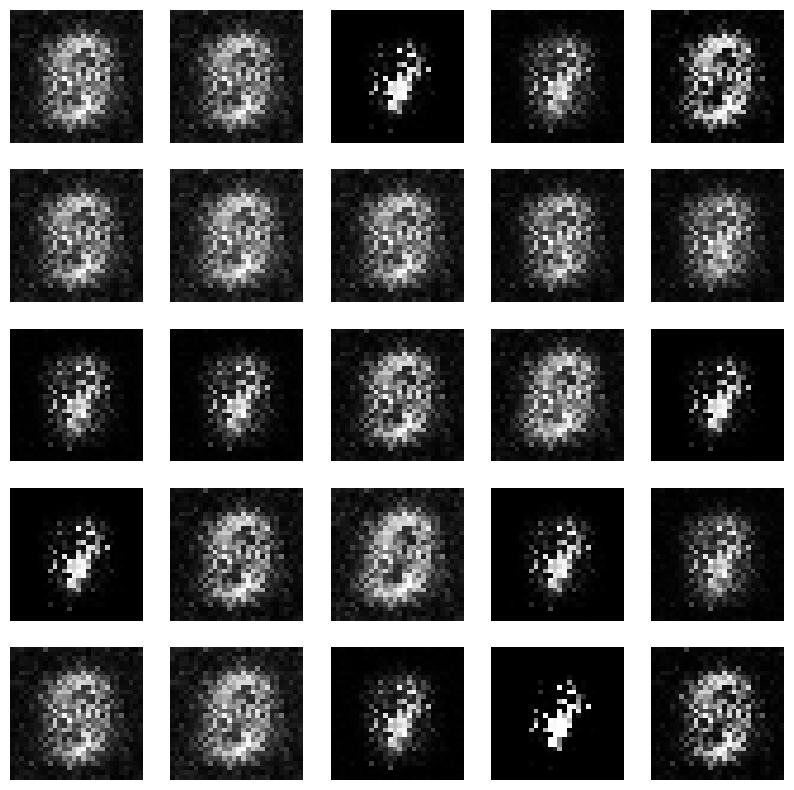

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# MNIST veri kümesini yükleme
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Üretici Ağ
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Ayırt Edici Ağ
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Model ve optimizasyon fonksiyonları
generator = Generator()
discriminator = Discriminator()
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# Eğitim
num_epochs = 3
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)

        # Ayırt ediciyi eğitin
        discriminator.zero_grad()
        real_labels = torch.ones(inputs.size(0), 1)
        fake_labels = torch.zeros(inputs.size(0), 1)

        # Gerçek veri için ayırt ediciyi eğit
        outputs = discriminator(inputs)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        # Üretilen veri için ayırt ediciyi eğit
        noise = torch.randn(inputs.size(0), 100)
        fake_inputs = generator(noise)
        outputs = discriminator(fake_inputs.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()

        d_loss = d_loss_real + d_loss_fake
        optimizer_d.step()

        # Üreticiyi eğitin
        generator.zero_grad()
        outputs = discriminator(fake_inputs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Step [{i}/{len(trainloader)}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")

# Üretilen resimleri görselleştirme
noise = torch.randn(25, 100)
fake_images = generator(noise).detach().numpy()
fake_images = fake_images.reshape(-1, 28, 28)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(fake_images[i], cmap='gray')
    ax.axis('off')
plt.show()


Epoch [0/10], Step [0/938], d_loss: 1.3680169582366943, g_loss: 0.6694920659065247
Epoch [0/10], Step [100/938], d_loss: 0.1490067094564438, g_loss: 2.9327869415283203
Epoch [0/10], Step [200/938], d_loss: 0.42631080746650696, g_loss: 1.349384069442749
Epoch [0/10], Step [300/938], d_loss: 0.08931784331798553, g_loss: 5.150221824645996
Epoch [0/10], Step [400/938], d_loss: 0.16831257939338684, g_loss: 4.09311056137085
Epoch [0/10], Step [500/938], d_loss: 0.0921853706240654, g_loss: 4.741815567016602
Epoch [0/10], Step [600/938], d_loss: 0.0882495865225792, g_loss: 4.262176513671875
Epoch [0/10], Step [700/938], d_loss: 0.4607217311859131, g_loss: 3.1021714210510254
Epoch [0/10], Step [800/938], d_loss: 0.1344902515411377, g_loss: 3.4455580711364746
Epoch [0/10], Step [900/938], d_loss: 0.3813473880290985, g_loss: 2.8298521041870117
Epoch [1/10], Step [0/938], d_loss: 0.6297653317451477, g_loss: 3.1442954540252686
Epoch [1/10], Step [100/938], d_loss: 0.4861363172531128, g_loss: 2.7913

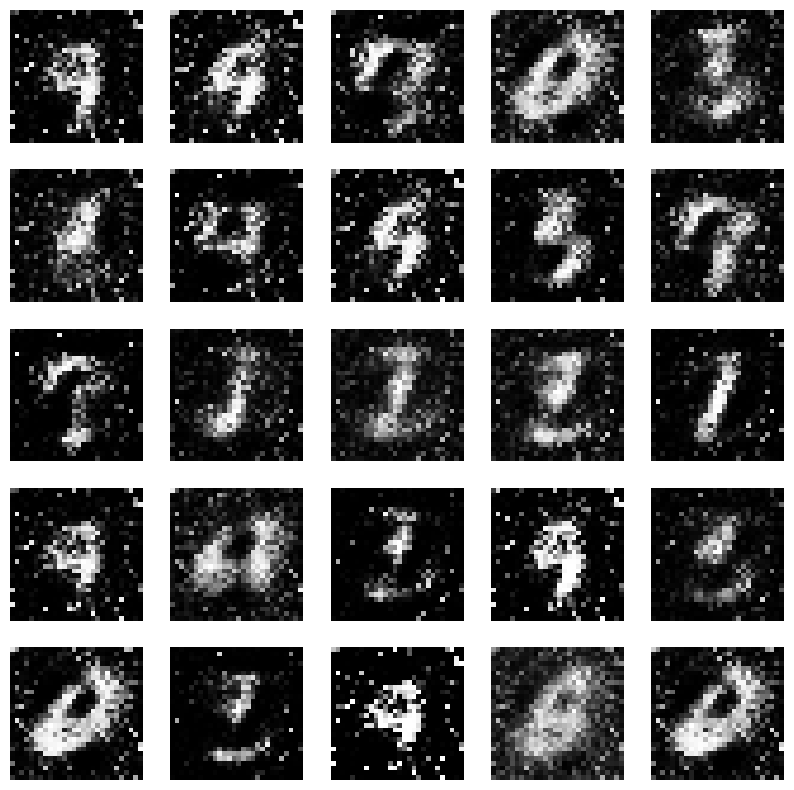

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# MNIST veri kümesini yükleme
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Üretici Ağ
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Ayırt Edici Ağ
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Model ve optimizasyon fonksiyonları
generator = Generator()
discriminator = Discriminator()
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)

# Eğitim
num_epochs = 10
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)

        # Ayırt ediciyi eğitin
        discriminator.zero_grad()
        real_labels = torch.ones(inputs.size(0), 1)
        fake_labels = torch.zeros(inputs.size(0), 1)

        # Gerçek veri için ayırt ediciyi eğit
        outputs = discriminator(inputs)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        # Üretilen veri için ayırt ediciyi eğit
        noise = torch.randn(inputs.size(0), 100)
        fake_inputs = generator(noise)
        outputs = discriminator(fake_inputs.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()

        d_loss = d_loss_real + d_loss_fake
        optimizer_d.step()

        # Üreticiyi eğitin
        generator.zero_grad()
        outputs = discriminator(fake_inputs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Step [{i}/{len(trainloader)}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}")

# Üretilen resimleri görselleştirme
noise = torch.randn(25, 100)
fake_images = generator(noise).detach().numpy()
fake_images = fake_images.reshape(-1, 28, 28)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(fake_images[i], cmap='gray')
    ax.axis('off')
plt.show()
